Le code suivant est fait pour analyser les images pour detecter des patalogiesrespiratoire : covid, pneumonie bacterienne et virale

Source des image: 

In [1]:
import os,shutil

base_dir =  '/home/tchinda/Python_env_code/venv/traitement _image/Covid_Data_GradientCrescent/all'

#repertoire contenant les données d'entrainement et de test

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

# Dictionnaire regroupant les répertoires et leur nom associé
dirs = {
    'train_covid_dir': os.path.join(train_dir, 'covid'),
    'train_normal_dir': os.path.join(train_dir, 'normal'),
    'train_pneumonia_bac_dir': os.path.join(train_dir, 'pneumonia_bac'),
    'train_pneumonia_vir_dir': os.path.join(train_dir, 'pneumonia_vir'),
    'test_covid_dir': os.path.join(test_dir, 'covid'),
    'test_normal_dir': os.path.join(test_dir, 'normal'),
    'test_pneumonia_bac_dir': os.path.join(test_dir, 'pneumonia_bac'),
    'test_pneumonia_vir_dir': os.path.join(test_dir, 'pneumonia_vir')
}

# Affichage du nombre de fichiers dans chaque répertoire
for key, path in dirs.items():
    count = len(os.listdir(path))
    print(f"Il y a {count} fichiers dans {key}")

"""
train_covid_dir = os.path.join(train_dir,'covid')
train_normal_dir = os.path.join(train_dir,'normal')
train_pneumonia_bac_dir = os.path.join(train_dir,'pneumonia_bac')
train_pneumonia_vir_dir = os.path.join(train_dir,'pneumonia_vir')

test_covid_dir = os.path.join(test_dir,'covid')
test_normal_dir = os.path.join(test_dir,'normal')
test_pneumonia_bac_dir = os.path.join(test_dir,'pneumonia_bac')
test_pneumonia_vir_dir = os.path.join(test_dir,'pneumonia_vir')
"""

Il y a 60 fichiers dans train_covid_dir
Il y a 70 fichiers dans train_normal_dir
Il y a 70 fichiers dans train_pneumonia_bac_dir
Il y a 71 fichiers dans train_pneumonia_vir_dir
Il y a 9 fichiers dans test_covid_dir
Il y a 9 fichiers dans test_normal_dir
Il y a 9 fichiers dans test_pneumonia_bac_dir
Il y a 10 fichiers dans test_pneumonia_vir_dir


"\ntrain_covid_dir = os.path.join(train_dir,'covid')\ntrain_normal_dir = os.path.join(train_dir,'normal')\ntrain_pneumonia_bac_dir = os.path.join(train_dir,'pneumonia_bac')\ntrain_pneumonia_vir_dir = os.path.join(train_dir,'pneumonia_vir')\n\ntest_covid_dir = os.path.join(test_dir,'covid')\ntest_normal_dir = os.path.join(test_dir,'normal')\ntest_pneumonia_bac_dir = os.path.join(test_dir,'pneumonia_bac')\ntest_pneumonia_vir_dir = os.path.join(test_dir,'pneumonia_vir')\n"

affichons une image pour voir ces caracteristiques

les dimensions des images sont : (439, 362)


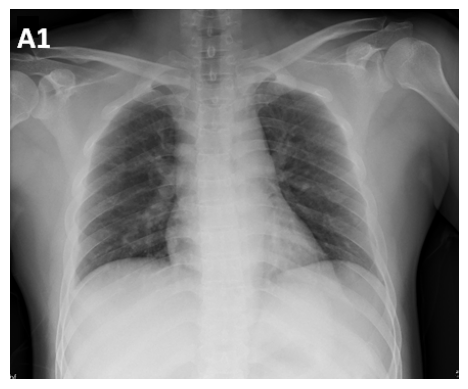

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

target_dir = dirs['train_covid_dir']

first_image = os.listdir(target_dir)[0]
first_image_path = os.path.join(target_dir,first_image)
img = Image.open(first_image_path)

#les caracteristiques de l'imges
print(f"les dimensions des images sont : {img.size}")

# affichage de l'image
plt.imshow(img)
plt.axis("off")
plt.show()

## creation de l'architecture du reseau

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Chargement du modèle MobileNetV2 pré-entraîné sans la couche fully-connected finale
base_model =VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ajout des nouvelles couches pour notre problème de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Réduit la dimensionnalité sans créer trop de paramètres
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Création du modèle final
model_tl = Model(inputs=base_model.input, outputs=predictions)

# On fige les couches de base pour commencer
for layer in base_model.layers:
    layer.trainable = False

# Compilation du modèle
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_tl.summary()

2025-02-05 10:17:21.751556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738747041.773729   14865 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738747041.780661   14865 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 10:17:21.802928: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


W0000 00:00:1738747043.696720   14865 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,868 (56.38 MB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Pretaitement des données

Found 270 images belonging to 4 classes.
Found 36 images belonging to 4 classes.


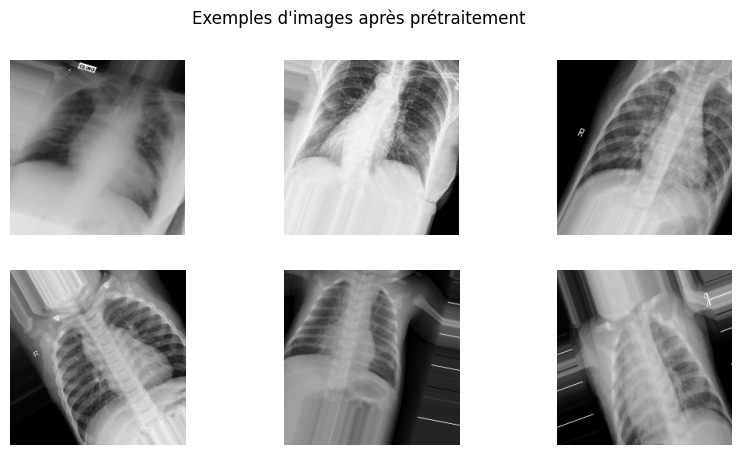

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définition des répertoires
base_dir = '/home/tchinda/Python_env_code/venv/traitement _image/Covid_Data_GradientCrescent/all'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Générateur pour l'entraînement avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Générateur pour les tests : seule la normalisation
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateur d'images pour l'entraînement
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

# Générateur d'images pour le test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

# Affichage d'un échantillon d'images prétraitées
sample_batch, _ = next(train_generator)
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_batch[i])
    plt.axis("off")
plt.suptitle("Exemples d'images après prétraitement")
plt.show()

In [5]:
# Vous pouvez ensuite entraîner ce modèle de la même manière en utilisant vos générateurs d'images :
history_tl = model_tl.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,  # Par exemple 50 epochs, puis éventuellement dégeler certaines couches
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Sauvegarde
model_tl.save('covid_pneumonia_model_tl_CGG16.h5')

/home/tchinda/Python_env_code/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.2929 - loss: 1.4218 - val_accuracy: 0.3333 - val_loss: 1.3996
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.3226 - loss: 1.3608 - val_accuracy: 0.3333 - val_loss: 1.3417
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.3470 - loss: 1.3163 - val_accuracy: 0.2500 - val_loss: 1.3282
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.4121 - loss: 1.2536 - val_accuracy: 0.3056 - val_loss: 1.2777
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.4837 - loss: 1.1941 - val_accuracy: 0.3333 - val_loss: 1.2510
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.5012 - loss: 1.1472 - val_accuracy: 0.4722 - val_loss: 1.2166
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5015 - loss: 1.1226 - val_accuracy: 0.3889 - val_loss: 1.2003
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5251 - loss: 1.1000 - val_accuracy: 0.3611 - val_loss:

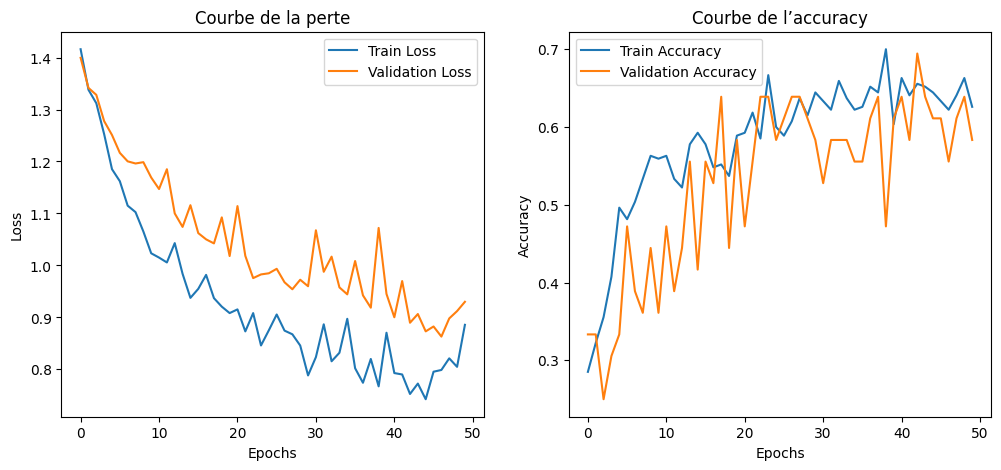

In [6]:
# Affichage des courbes d'entraînement
plt.figure(figsize=(12, 5))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Courbe de la perte')
plt.legend()

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Courbe de l’accuracy')
plt.legend()

plt.show()

In [7]:
# Évaluation sur le jeu de test
loss, accuracy = model_tl.evaluate(test_generator)
print("📊 Résultats du modèle sur l’ensemble de test :")
print(f"   Loss (perte) : {loss:.4f}")
print(f"   Accuracy : {accuracy:.4f} (soit {accuracy*100:.2f}%)")

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5722 - loss: 0.8942
📊 Résultats du modèle sur l’ensemble de test :
   Loss (perte) : 0.9300
   Accuracy : 0.5833 (soit 58.33%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
L’image est classée comme : PNEUMONIA_BAC


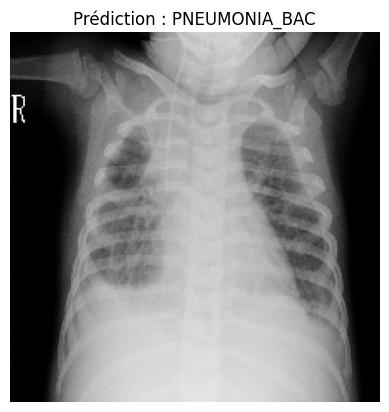

In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Exemple de prédiction sur une image
# Chemin vers une image test (à adapter selon votre environnement)
image_path = "/home/tchinda/Python_env_code/venv/traitement _image/Covid_Data_GradientCrescent/all/train/pneumonia_bac/person1935_bacteria_4850.jpeg"
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisation

predictions = model_tl.predict(img_array)

# Les classes doivent être dans le même ordre que celles générées par flow_from_directory
classes = ["COVID", "NORMAL", "PNEUMONIA_BAC", "PNEUMONIA_VIR"]
predicted_class = classes[np.argmax(predictions)]
print(f"L’image est classée comme : {predicted_class}")

plt.imshow(img)
plt.title(f"Prédiction : {predicted_class}")
plt.axis("off")
plt.show()